#Marketing Advertisement

we are working for an  **e-learning company** that offers courses on programming.

We want to promote our product and we'd like to invest some money in advertisement.

**Our goal in this project is to find out the two best markets to advertise our product in.**

we could organize surveys for a couple of different markets to find out which would the best choices for advertising. This is very costly, however, and it's a good call to explore cheaper options first.

One good candidate is the data from **freeCodeCamp's 2017** New Coder Survey. **freeCodeCamp** is a free e-learning platform that offers courses on web development.

Because they run a popular Medium publication (over 400,000 followers), their survey attracted new coders with varying interests (not only web development), which is ideal for the purpose of our analysis.

#Reading Dataset

In [138]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline


In [139]:
# Read in the data

direct_link = 'https://raw.githubusercontent.com/freeCodeCamp/2017-new-coder-survey/master/clean-data/2017-fCC-New-Coders-Survey-Data.csv'
fcc = pd.read_csv(direct_link, low_memory = 0) # low_memory = False to silence dtypes warning

# Quick exploration of the data
print(fcc.shape)
pd.options.display.max_columns = 150 # to avoid truncated output
fcc.head()

(18175, 136)


,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,CodeEventFCC,CodeEventGameJam,CodeEventGirlDev,CodeEventHackathons,CodeEventMeetup,CodeEventNodeSchool,CodeEventNone,CodeEventOther,CodeEventRailsBridge,CodeEventRailsGirls,CodeEventStartUpWknd,CodeEventWkdBootcamps,CodeEventWomenCode,CodeEventWorkshops,CommuteTime,CountryCitizen,CountryLive,EmploymentField,EmploymentFieldOther,EmploymentStatus,EmploymentStatusOther,ExpectedEarning,FinanciallySupporting,FirstDevJob,Gender,GenderOther,HasChildren,HasDebt,HasFinancialDependents,HasHighSpdInternet,HasHomeMortgage,HasServedInMilitary,HasStudentDebt,HomeMortgageOwe,HoursLearning,ID.x,ID.y,Income,IsEthnicMinority,IsReceiveDisabilitiesBenefits,IsSoftwareDev,IsUnderEmployed,JobApplyWhen,JobInterestBackEnd,JobInterestDataEngr,JobInterestDataSci,JobInterestDevOps,JobInterestFrontEnd,JobInterestFullStack,JobInterestGameDev,JobInterestInfoSec,JobInterestMobile,JobInterestOther,JobInterestProjMngr,JobInterestQAEngr,JobInterestUX,JobPref,JobRelocateYesNo,JobRoleInterest,JobWherePref,LanguageAtHome,MaritalStatus,MoneyForLearning,MonthsProgramming,NetworkID,Part1EndTime,Part1StartTime,Part2EndTime,Part2StartTime,PodcastChangeLog,PodcastCodeNewbie,PodcastCodePen,PodcastDevTea,PodcastDotNET,PodcastGiantRobots,PodcastJSAir,PodcastJSJabber,PodcastNone,PodcastOther,PodcastProgThrowdown,PodcastRubyRogues,PodcastSEDaily,PodcastSERadio,PodcastShopTalk,PodcastTalkPython,PodcastTheWebAhead,ResourceCodecademy,ResourceCodeWars,ResourceCoursera,ResourceCSS,ResourceEdX,ResourceEgghead,ResourceFCC,ResourceHackerRank,ResourceKA,ResourceLynda,ResourceMDN,ResourceOdinProj,ResourceOther,ResourcePluralSight,ResourceSkillcrush,ResourceSO,ResourceTreehouse,ResourceUdacity,ResourceUdemy,ResourceW3S,SchoolDegree,SchoolMajor,StudentDebtOwe,YouTubeCodeCourse,YouTubeCodingTrain,YouTubeCodingTut360,YouTubeComputerphile,YouTubeDerekBanas,YouTubeDevTips,YouTubeEngineeredTruth,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston
0,27.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15 to 29 minutes,Canada,Canada,software development and IT,NaN,Employed for wages,NaN,NaN,NaN,NaN,female,NaN,NaN,1.0,0.0,1.0,0.0,0.0,0.0,NaN,15.0,02d9465b21e8bd09374b0066fb2d5614,eb78c1c3ac6cd9052aec557065070fbf,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,start your own business,NaN,NaN,NaN,English,married or domestic partnership,150.0,6.0,6f1fbc6b2b,2017-03-09 00:36:22,2017-03-09 00:32:59,2017-03-09 00:59:46,2017-03-09 00:36:26,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,"some college credit, no degree",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,34.0,0.0,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,United States of America,NaN,NaN,Not working but looking for work,NaN,35000.0,NaN,NaN,male,NaN,NaN,1.0,0.0,1.0,0.0,0.0,1.0,NaN,10.0,5bfef9ecb211ec4f518cfc1d2a6f3e0c,21db37adb60cdcafadfa7dca1b13b6b1,NaN,0.0,0.0,0.0,NaN,Within 7 to 12 months,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,work for a nonprofit,1.0,Full-Stack Web Developer,in an office with other developers,English,"single, never married",80.0,6.0,f8f8be6910,2017-03-09 00:37:07,2017-03-09 00:33:26,2017-03-09 00:38:59,2017-03-09 00:37:10,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,1.0,"some college credit, no degree",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,21.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,NaN,

# Questions?

For the purpose of our analysis, we want to answer questions about a p**opulation of new coders that are interested in the subjects we teach**. We'd like to know:

  * Where are these new coders located. - Country Location for new coders
  * What are the locations with the greatest number of new coders. top 5 countries
  * How much money new coders are willing to spend on learning -

# The Sample is representative?

  * Figure out whether the sample we have is representative for our population of interest.
  * The `JobRoleInterest` column describes for every participant the role(s) they'd be interested in working.
  * Generate a frequency distribution table for this column. Take **percentages** instead of absolute frequencies.

In [140]:
freq_job = fcc['JobRoleInterest'].value_counts(normalize=True,ascending=False).head(10)*100 #Generating top 5 main interests
freq_job

,proportion
JobRoleInterest,
Full-Stack Web Developer,11.770595
Front-End Web Developer,6.435927
Data Scientist,2.173913
Back-End Web Developer,2.030892
Mobile Developer,1.673341
Game Developer,1.630435
Information Security,1.315789
"Full-Stack Web Developer, Front-End Web Developer",0.915332
"Front-End Web Developer, Full-Stack Web Developer",0.800915


#Insights:

  **1 -Are people interested in only one subject or they can be interested in more than one subject?**

  The information in the table above is quite granular, but from a quick scan it looks like:

A lot of people are interested in web development (full-stack web development, front-end web development and back-end web development).

A few people are interested in mobile development.

A few people are interested in domains other than web and mobile development.

**2 - If most people are interested in more than one subject, is this sample still representative?**

 **3 - The focus of our courses is on web and mobile development. How many people are interested in at least one of these two subjects?**

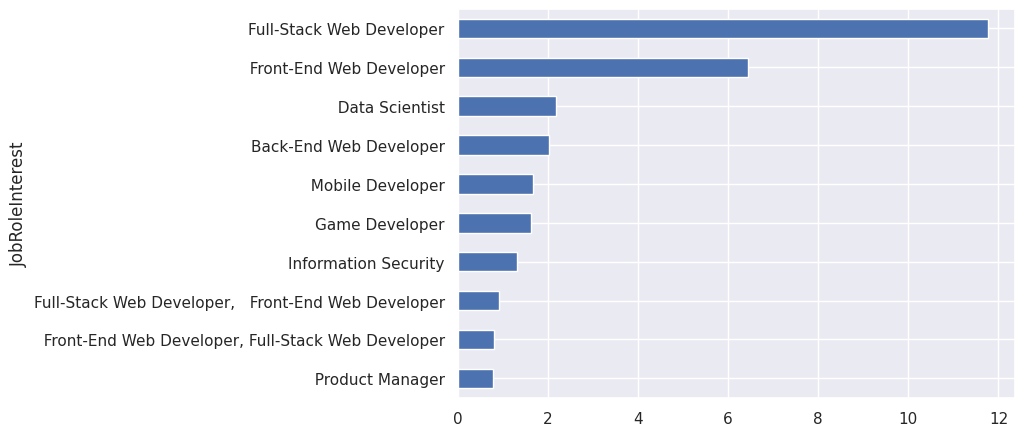

In [141]:
freq_job.sort_values().plot.barh() #Plot for top 10 main interests
plt.show()

## Spliting Job Role into 2 parts

Split each string in the JobRoleInterest column to find the number of options for each participant.

We'll first drop the null values because we can't split Nan values.
Generate a frequency table for the variable describing the number of options.

In [142]:
# Split each string in the 'JobRoleInterest' column
interests_no_nulls = fcc['JobRoleInterest'].dropna()
splitted_interests = interests_no_nulls.str.split(',') #create list of list of job options

# Frequency table for the var describing the number of options
n_of_options = splitted_interests.apply(lambda x: len(x)) # x counts in a list of job options
n_of_options.value_counts(normalize = True).sort_index() * 100

,proportion
JobRoleInterest,
1,31.650458
2,10.883867
3,15.889588
4,15.217391
5,12.042334
6,6.721968
7,3.861556
8,1.759153
9,0.986842


It turns out that only **31.7%** of the participants have a clear idea about what programming niche they'd like to work in, while the vast majority of students have mixed interests. But given that we offer courses on various subjects, the fact that new coders have mixed interest might be actually good for us.

The focus of our courses is on **web and mobile development**, so let's find out how many respondents chose at least one of these two option

JobRoleInterest
False    67.048055
True     32.951945
Name: proportion, dtype: float64


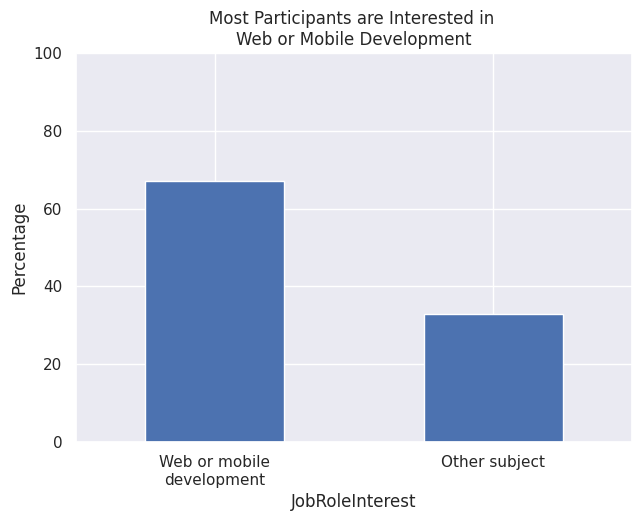

In [143]:
# Frequency table
web_or_mobile = interests_no_nulls.str.contains(
    'Web Developer | Mobile Developer') # regular expression WEB DEVELOPER or MOBILE DEVELOPER
freq_table = web_or_mobile.value_counts(normalize = True) * 100
print(freq_table)

# Graph for the frequency table above
#plt.style.use('fivethirtyeight')

freq_table.plot.bar()
plt.title('Most Participants are Interested in \nWeb or Mobile Development') # y pads the title upward
plt.ylabel('Percentage', fontsize = 12)
plt.xticks([0,1],['Web or mobile\ndevelopment', 'Other subject'],
           rotation = 0) # the initial xtick labels were True and False
plt.ylim([0,100])
plt.show()

It turns out that most people in this survey **(roughly 86%)** are interested in **either web or mobile development**. These figures offer us a strong reason to consider this sample representative for our population of interest. We want to advertise our courses to people interested in all sorts of programming niches but mostly web and mobile development.

Now we need to figure out what are the best markets to invest money in for advertising our courses. We'd like to know:

Where are these new coders located.
What are the locations with the greatest number of new coders.
How much money new coders are willing to spend on learning.

# Finding the best country market

One indicator of a good market is the number of potential customers — the more potential customers in a market, the better.

If our ads manage to convince 10% of the 5000 potential customers in market A to buy our product, then this is better than convincing 100% of the 30 potential customers in market B

1- Generate a frequency table for the **CountryLive** variable.
    
  * Generate both absolute and relative frequencies.


2 - Based on the results, what are the two markets you'd choose for advertisement?

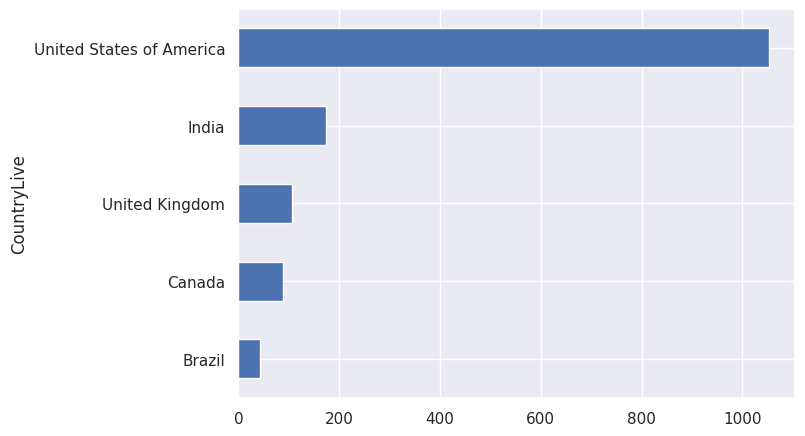

<Axes: ylabel='CountryLive'>

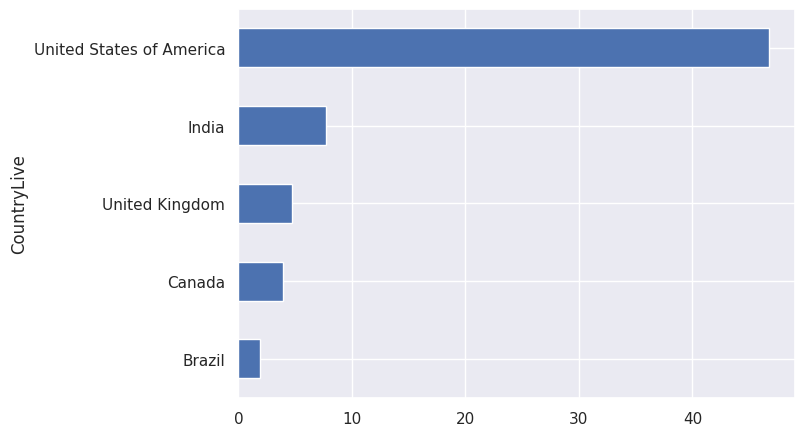

In [144]:
fcc_clean = fcc.dropna(subset=['JobRoleInterest'])

#Selecting the 2 biggest countries with Job Role Interested in Web or Mobile Applications
freq_country = fcc_clean[web_or_mobile]['CountryLive'].value_counts(ascending=False)
distro_country = fcc_clean[web_or_mobile]['CountryLive'].value_counts(normalize=True,ascending=False)*100

# Display the frequency tables in a more readable format
pd.DataFrame(data = {'Absolute frequency': freq_country,
                     'Percentage': distro_country}
            )
freq_country[:5].sort_values().plot.barh()
plt.show()
distro_country[0:5].sort_values().plot.barh()

We can see from bar plot above that the main 2 countries are USA and India.

USA users represents over 40% of interest
India represents roughly 10%

#Spending Money for Learning

 We can continue by figuring out how much money new coders are actually willing to spend on learning.

 Advertising within markets where most people are only willing to learn for free is extremely unlikely to be profitable for us.

 The company is interested in how much a user would spend **per month** in learning.

 It also seems like a good idea to narrow down our analysis to only four countries: the US, India, the United Kingdom, and Canada. Two reasons for this decision are:

These are the countries having the highest absolute frequencies in our sample, which means we have a decent amount of data for each.
Our courses are written in English, and English is an official language in all these four countries. The more people that know English, the better our chances to target the right people with our ads.

##Instructions

1 - The `MoneyForLearning` column describes in American dollars the amount of money spent by participants from the moment they started coding until the moment they completed the survey.

2 - We need to convert `MoneyForLearning` all time to `money per month`

3 - You'll need to divide the `MoneyForLearning` column to the `MonthsProgramming` column.

  * Some students answered that they had been learning to code for 0 months (it might be that they had just started when they completed the survey). To avoid dividing by 0, replace all the values of 0 with 1.




### Replacing 0 month to 1

In [145]:
#Replace 0 months to 1 in MonthsProgramming column
freq_months = fcc_clean['MonthsProgramming'].value_counts().sort_index()

fcc_clean['MonthsProgramming'] = fcc_clean['MonthsProgramming'].replace(0,1).copy()

freq_months = fcc_clean['MonthsProgramming'].value_counts().sort_index()
print(freq_months) #after replacement

MonthsProgramming
1.0      1002
2.0       669
3.0       637
4.0       367
5.0       279
         ... 
360.0       5
370.0       1
408.0       1
480.0       2
744.0       4
Name: count, Length: 90, dtype: int64


<ipython-input-145-73c90e180a4b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fcc_clean['MonthsProgramming'] = fcc_clean['MonthsProgramming'].replace(0,1).copy()


### Creating New column

In [157]:
#Creating new colums - spending money / month
fcc_clean['spent_month'] = fcc_clean['MoneyForLearning'] / fcc_clean['MonthsProgramming']

#removing null values from country column
fcc_clean = fcc_clean[fcc_clean['CountryLive'].notnull()]
print("Nulls in Country Live",fcc_clean['CountryLive'].isna().sum())


freq_spent_month = fcc_clean['spent_month'].value_counts().sort_index() #generating freq distribution for money spent per month

#removing values with 0 dolars spent per month
freq_spent_month = freq_spent_month.drop(labels=0).sort_values(ascending=False)
#print(freq_spent_month)



Nulls in Country Live 0


<ipython-input-157-ec5059e5a408>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fcc_clean['spent_month'] = fcc_clean['MoneyForLearning'] / fcc_clean['MonthsProgramming']


###Group By Country

find out how much money a student spends on average each month in the US, India, the United Kingdom and Canada.

In [158]:
country = fcc_clean.groupby('CountryLive')['spent_month']
countries_mean = country.mean()[['United States of America', 'India', 'Canada','United Kingdom']]
countries_median = country.median()[['United States of America', 'India', 'Canada','United Kingdom']]
countries_modes = country.agg(pd.Series.mode)[['United States of America', 'India', 'Canada','United Kingdom']]

print(countries_mean)


CountryLive
United States of America    227.997996
India                       135.100982
Canada                      113.510961
United Kingdom               45.534443
Name: spent_month, dtype: float64


We found out that there are no values for median and mode for those countries.

We also found out that the highest spent_month mean is in USA with 227 dolars

**Plot Statistics**

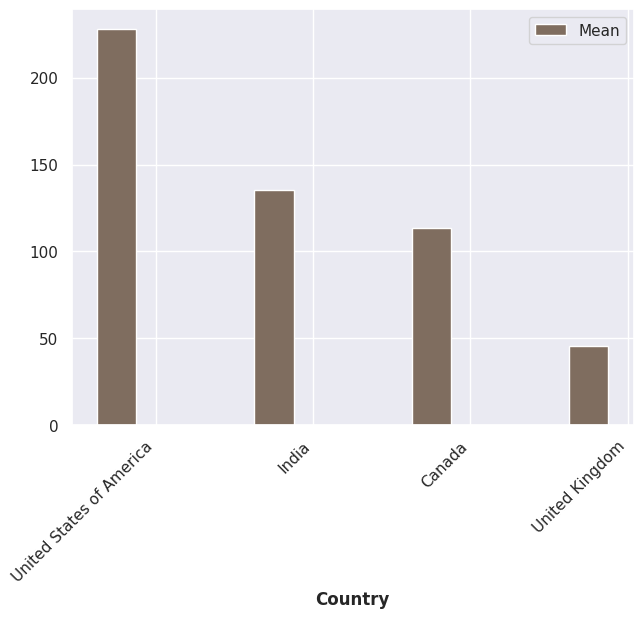

In [159]:
# Sample Data (Replace with your actual data)
countries = ['United States of America', 'India', 'Canada', 'United Kingdom']
countries_mean = pd.Series(countries_mean, index=countries)  # Example mean values
countries_median = pd.Series(countries_median, index=countries)  # Example median values
countries_modes = pd.Series(countries_modes, index=countries)  # Example mode values


# Reshape the data for grouped bar plotting

data = {'Mean': countries_mean, 'Median': countries_median, 'Mode': countries_modes}
df = pd.DataFrame(data)

# Set the width of the bars
barWidth = 0.25

# Set position of bar on X axis
r1 = np.arange(len(countries))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]

# Make the plot
plt.bar(r1, df['Mean'], color='#7f6d5f', width=barWidth, edgecolor='white', label='Mean')
plt.legend()
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
# Add xticks on the middle of the group bars
plt.xlabel('Country', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(countries))], countries, rotation=45, ha='right')

plt.show()



# Dealing with Extreme Outliers

1 - Generate four box plots on the same figure to visualize for each country (the US, India, the United Kingdom, Canada) the distribution of the variable that describes how much money each participant had spent per month

 * Eliminate the extreme outliers.

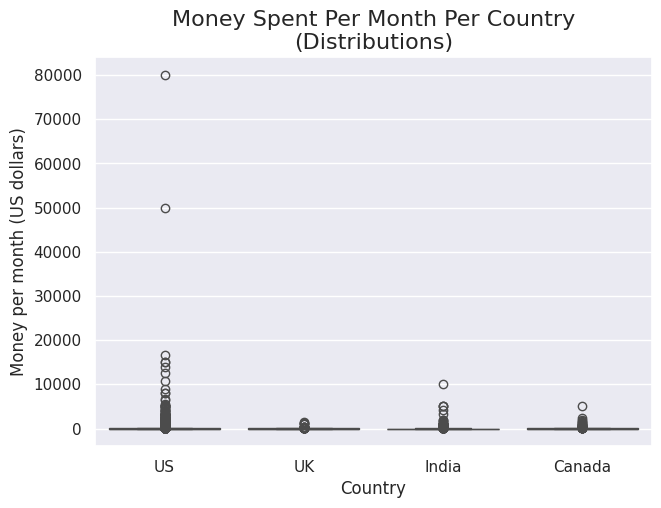

In [161]:
# Isolate only the countries of interest
countries = fcc_clean[fcc_clean['CountryLive'].str.contains(
    'United States of America|India|United Kingdom|Canada')]

# Box plots to visualize distributions
import seaborn as sns
sns.boxplot(y = 'spent_month', x = 'CountryLive',
            data = countries)
plt.title('Money Spent Per Month Per Country\n(Distributions)',
         fontsize = 16)
plt.ylabel('Money per month (US dollars)')
plt.xlabel('Country')
plt.xticks(range(4), ['US', 'UK', 'India', 'Canada']) # avoids tick labels overlap
plt.show()

we can see immediately that there's something really off for the US: two persons spend each month over 5000 dolars per month.

 it is impossible. We should remove those outliers


We can see a few extreme outliers for India (values over $2500 per month), but it's unclear whether this is good data or not. Maybe these persons attended several bootcamps, which tend to be very expensive. Let's examine these two data points to see if we can find anything relevant.

## Analyzing outliers from india

In [203]:
# Inspect the extreme outliers for India
india_outliers = countries[
    (countries['CountryLive'] == 'India') &
    (countries['spent_month'] >= 2500)]
india_outliers

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,CodeEventFCC,CodeEventGameJam,CodeEventGirlDev,CodeEventHackathons,CodeEventMeetup,CodeEventNodeSchool,CodeEventNone,CodeEventOther,CodeEventRailsBridge,CodeEventRailsGirls,CodeEventStartUpWknd,CodeEventWkdBootcamps,CodeEventWomenCode,CodeEventWorkshops,CommuteTime,CountryCitizen,CountryLive,EmploymentField,EmploymentFieldOther,EmploymentStatus,EmploymentStatusOther,ExpectedEarning,FinanciallySupporting,FirstDevJob,Gender,GenderOther,HasChildren,HasDebt,HasFinancialDependents,HasHighSpdInternet,HasHomeMortgage,HasServedInMilitary,HasStudentDebt,HomeMortgageOwe,HoursLearning,ID.x,ID.y,Income,IsEthnicMinority,IsReceiveDisabilitiesBenefits,IsSoftwareDev,IsUnderEmployed,JobApplyWhen,JobInterestBackEnd,JobInterestDataEngr,JobInterestDataSci,JobInterestDevOps,JobInterestFrontEnd,JobInterestFullStack,JobInterestGameDev,JobInterestInfoSec,JobInterestMobile,JobInterestOther,JobInterestProjMngr,JobInterestQAEngr,JobInterestUX,JobPref,JobRelocateYesNo,JobRoleInterest,JobWherePref,LanguageAtHome,MaritalStatus,MoneyForLearning,MonthsProgramming,NetworkID,Part1EndTime,Part1StartTime,Part2EndTime,Part2StartTime,PodcastChangeLog,PodcastCodeNewbie,PodcastCodePen,PodcastDevTea,PodcastDotNET,PodcastGiantRobots,PodcastJSAir,PodcastJSJabber,PodcastNone,PodcastOther,PodcastProgThrowdown,PodcastRubyRogues,PodcastSEDaily,PodcastSERadio,PodcastShopTalk,PodcastTalkPython,PodcastTheWebAhead,ResourceCodecademy,ResourceCodeWars,ResourceCoursera,ResourceCSS,ResourceEdX,ResourceEgghead,ResourceFCC,ResourceHackerRank,ResourceKA,ResourceLynda,ResourceMDN,ResourceOdinProj,ResourceOther,ResourcePluralSight,ResourceSkillcrush,ResourceSO,ResourceTreehouse,ResourceUdacity,ResourceUdemy,ResourceW3S,SchoolDegree,SchoolMajor,StudentDebtOwe,YouTubeCodeCourse,YouTubeCodingTrain,YouTubeCodingTut360,YouTubeComputerphile,YouTubeDerekBanas,YouTubeDevTips,YouTubeEngineeredTruth,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,spent_month


In [202]:
# Remove the outliers for India
countries = countries.drop(india_outliers.index) # using the row labels

seems that neither participant attended a bootcamp. Overall, it's really hard to figure out from the data whether these persons really spent that much money with learning. The actual question of the survey was "Aside from university tuition, about how much money have you spent on learning to code so far (in US dollars)?", so they might have misunderstood and thought university tuition is included. It seems safer to remove these two rows.

In [200]:

# Isolate only those participants who spend less than 10000 per month
countries = countries[countries['spent_month'] < 20000]

print(max(countries['spent_month']))

10000.0


## Analyzing outliers in USA
Looking back at the box plot above, we can also see more extreme outliers for the US (values over $6000 per month). Let's examine these participants in more detail.

In [168]:

# Examine the extreme outliers for the US
us_outliers = countries[
    (countries['CountryLive'] == 'United States of America') &
    (countries['spent_month'] >= 6000)]

us_outliers

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,CodeEventFCC,CodeEventGameJam,CodeEventGirlDev,CodeEventHackathons,CodeEventMeetup,CodeEventNodeSchool,CodeEventNone,CodeEventOther,CodeEventRailsBridge,CodeEventRailsGirls,CodeEventStartUpWknd,CodeEventWkdBootcamps,CodeEventWomenCode,CodeEventWorkshops,CommuteTime,CountryCitizen,CountryLive,EmploymentField,EmploymentFieldOther,EmploymentStatus,EmploymentStatusOther,ExpectedEarning,FinanciallySupporting,FirstDevJob,Gender,GenderOther,HasChildren,HasDebt,HasFinancialDependents,HasHighSpdInternet,HasHomeMortgage,HasServedInMilitary,HasStudentDebt,HomeMortgageOwe,HoursLearning,ID.x,ID.y,Income,IsEthnicMinority,IsReceiveDisabilitiesBenefits,IsSoftwareDev,IsUnderEmployed,JobApplyWhen,JobInterestBackEnd,JobInterestDataEngr,JobInterestDataSci,JobInterestDevOps,JobInterestFrontEnd,JobInterestFullStack,JobInterestGameDev,JobInterestInfoSec,JobInterestMobile,JobInterestOther,JobInterestProjMngr,JobInterestQAEngr,JobInterestUX,JobPref,JobRelocateYesNo,JobRoleInterest,JobWherePref,LanguageAtHome,MaritalStatus,MoneyForLearning,MonthsProgramming,NetworkID,Part1EndTime,Part1StartTime,Part2EndTime,Part2StartTime,PodcastChangeLog,PodcastCodeNewbie,PodcastCodePen,PodcastDevTea,PodcastDotNET,PodcastGiantRobots,PodcastJSAir,PodcastJSJabber,PodcastNone,PodcastOther,PodcastProgThrowdown,PodcastRubyRogues,PodcastSEDaily,PodcastSERadio,PodcastShopTalk,PodcastTalkPython,PodcastTheWebAhead,ResourceCodecademy,ResourceCodeWars,ResourceCoursera,ResourceCSS,ResourceEdX,ResourceEgghead,ResourceFCC,ResourceHackerRank,ResourceKA,ResourceLynda,ResourceMDN,ResourceOdinProj,ResourceOther,ResourcePluralSight,ResourceSkillcrush,ResourceSO,ResourceTreehouse,ResourceUdacity,ResourceUdemy,ResourceW3S,SchoolDegree,SchoolMajor,StudentDebtOwe,YouTubeCodeCourse,YouTubeCodingTrain,YouTubeCodingTut360,YouTubeComputerphile,YouTubeDerekBanas,YouTubeDevTips,YouTubeEngineeredTruth,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,spent_month
718,26.0,1.0,0.0,0.0,The Coding Boot Camp at UCLA Extension,1.0,NaN,more than 1 million,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15 to 29 minutes,United States of America,United States of America,architecture or physical engineering,NaN,Employed for wages,NaN,50000.0,NaN,NaN,male,NaN,NaN,0.0,0.0,0.0,NaN,0.0,NaN,NaN,35.0,796ae14c2acdee36eebc250a252abdaf,d9e44d73057fa5d322a071adc744bf07,44500.0,0.0,0.0,0.0,1.0,Within the next 6 months,1.0,NaN,NaN,NaN,1.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,1.0,work for a startup,1.0,"User Experience Designer, Full-Stack Web Dev...",in an office with other developers,English,"single, never married",8000.0,1.0,50dab3f716,2017-03-09 21:26:35,2017-03-09 21:21:58,2017-03-09 21:29:10,2017-03-09 21:26:39,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,bachelor's degree,Architecture,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8000.000000
1222,32.0,1.0,0.0,0.0,The Iron Yard,1.0,NaN,"between 100,000 and 1 million",NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,United States of America,NaN,NaN,Not working and not looking for work,NaN,50000.0,NaN,NaN,female,NaN,NaN,1.0,0.0,1.0,0.0,0.0,0.0,NaN,50.0,bfabebb4293ac002d26a1397d00c7443,590f0be70e80f1daf5a23eb7f4a72a3d,NaN,0.0,0.0,0.0,NaN,Within the next 6 months,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,work for a nonprofit,1.0,"Front-End Web Developer, Mobile Developer,...",in an office with other developers,English,"single, never married",13000.0,2.0,e512c4bdd0,2017-03-10 02:14:11,2017-03-10 02:10:07,2017-03-10 02:15:32,2017-03-10 02:14:16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,


Out of these **11 extreme outliers**, **six people attended** bootcamps, which justify the large sums of money spent on learning. F**or the other five**, it's hard to figure out from the data where they could have spent that much money on learning. Consequently, we'll remove those rows where participants reported thay they spend $6000 each month, but they have never attended a bootcamp.

Also, the data shows that eight respondents had been programming for no more than three months when they completed the survey. They most likely paid a large sum of money for a bootcamp that was going to last for several months, so the amount of money spent per month is unrealistic and should be significantly lower (because they probably didn't spend anything for the next couple of months after the survey). As a consequence, we'll remove every these eight outliers.

In the next code block, we'll remove respondents that:

Didn't attend bootcamps.
Had been programming for three months or less when at the time they completed the survey.

In [170]:
# Remove the respondents who didn't attendent a bootcamp
no_bootcamp = countries[
    (countries['CountryLive'] == 'United States of America') &
    (countries['spent_month'] >= 6000) &
    (countries['AttendedBootcamp'] == 0)
]

countries = countries.drop(no_bootcamp.index)


# Remove the respondents that had been programming for less than 3 months
less_than_3_months = countries[
    (countries['CountryLive'] == 'United States of America') &
    (countries['spent_month'] >= 6000) &
    (countries['MonthsProgramming'] <= 3)
]

countries = countries.drop(less_than_3_months.index)

## Analyzing Outlier in Canada
 Looking again at the last box plot above, we can also see an extreme outlier for Canada — a person who spends roughly $5000 per month. Let's examine this person in more depth.

In [176]:
# Examine the extreme outliers for Canada
canada_outliers = countries[
    (countries['CountryLive'] == 'Canada') &
    (countries['spent_month'] > 4500)]

canada_outliers

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,CodeEventFCC,CodeEventGameJam,CodeEventGirlDev,CodeEventHackathons,CodeEventMeetup,CodeEventNodeSchool,CodeEventNone,CodeEventOther,CodeEventRailsBridge,CodeEventRailsGirls,CodeEventStartUpWknd,CodeEventWkdBootcamps,CodeEventWomenCode,CodeEventWorkshops,CommuteTime,CountryCitizen,CountryLive,EmploymentField,EmploymentFieldOther,EmploymentStatus,EmploymentStatusOther,ExpectedEarning,FinanciallySupporting,FirstDevJob,Gender,GenderOther,HasChildren,HasDebt,HasFinancialDependents,HasHighSpdInternet,HasHomeMortgage,HasServedInMilitary,HasStudentDebt,HomeMortgageOwe,HoursLearning,ID.x,ID.y,Income,IsEthnicMinority,IsReceiveDisabilitiesBenefits,IsSoftwareDev,IsUnderEmployed,JobApplyWhen,JobInterestBackEnd,JobInterestDataEngr,JobInterestDataSci,JobInterestDevOps,JobInterestFrontEnd,JobInterestFullStack,JobInterestGameDev,JobInterestInfoSec,JobInterestMobile,JobInterestOther,JobInterestProjMngr,JobInterestQAEngr,JobInterestUX,JobPref,JobRelocateYesNo,JobRoleInterest,JobWherePref,LanguageAtHome,MaritalStatus,MoneyForLearning,MonthsProgramming,NetworkID,Part1EndTime,Part1StartTime,Part2EndTime,Part2StartTime,PodcastChangeLog,PodcastCodeNewbie,PodcastCodePen,PodcastDevTea,PodcastDotNET,PodcastGiantRobots,PodcastJSAir,PodcastJSJabber,PodcastNone,PodcastOther,PodcastProgThrowdown,PodcastRubyRogues,PodcastSEDaily,PodcastSERadio,PodcastShopTalk,PodcastTalkPython,PodcastTheWebAhead,ResourceCodecademy,ResourceCodeWars,ResourceCoursera,ResourceCSS,ResourceEdX,ResourceEgghead,ResourceFCC,ResourceHackerRank,ResourceKA,ResourceLynda,ResourceMDN,ResourceOdinProj,ResourceOther,ResourcePluralSight,ResourceSkillcrush,ResourceSO,ResourceTreehouse,ResourceUdacity,ResourceUdemy,ResourceW3S,SchoolDegree,SchoolMajor,StudentDebtOwe,YouTubeCodeCourse,YouTubeCodingTrain,YouTubeCodingTut360,YouTubeComputerphile,YouTubeDerekBanas,YouTubeDevTips,YouTubeEngineeredTruth,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,spent_month


Here, the situation is similar to some of the US respondents — this participant had been programming for no more than two months when he completed the survey. He seems to have paid a large sum of money in the beginning to enroll in a bootcamp, and then he probably didn't spend anything for the next couple of months after the survey. We'll take the same approach here as for the US and remove this outlier.

In [174]:
# Remove the extreme outliers for Canada
#only_4 = only_4.drop(canada_outliers.index) DONE

KeyError: '[13659] not found in axis'

In [204]:
# Recompute mean sum of money spent by students each month
countries = countries[countries['spent_month'].notnull()]
print("Nulls in Country Live",countries['spent_month'].isna().sum())

print(countries.groupby('CountryLive')['spent_month'].mean())


Nulls in Country Live 0
CountryLive
Canada                       93.065400
India                        65.758763
United Kingdom               45.534443
United States of America    142.654608
Name: spent_month, dtype: float64


## PLotting

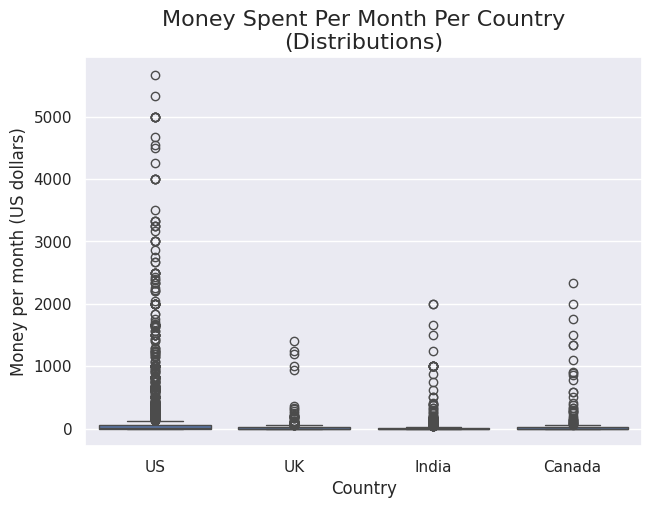

In [205]:
# Visualize the distributions again
sns.boxplot(y = 'spent_month', x = 'CountryLive',
            data = countries)
plt.title('Money Spent Per Month Per Country\n(Distributions)',
          fontsize = 16)
plt.ylabel('Money per month (US dollars)')
plt.xlabel('Country')
plt.xticks(range(4), ['US', 'UK', 'India', 'Canada']) # avoids tick labels overlap
plt.show()

# Choosing the Two Best Markets

Obviously, one country we should advertise in is the US. Lots of new coders live there and they are willing to pay a good amount of money each month (roughly $143).


Considering we sell subscriptions at a price of $59 per month.

We would sell subscriptions at a price of
93 per month in Canada, compared to India $65.


The data suggests strongly that we shouldn't advertise in the UK, but let's take a second look at India before deciding to choose Canada as our second best choice: